# AOGS Workshop 2024: Accessing CMIP6 data.
## CMIP6 data can be accessed in several ways. Here, we will download the same data using different approaches:
* Access using Google Cloud
* Access using ESGF Website
* Access using ESGF-API
* Access using Intake-ESM
     

### The Pros and Cons for each method is listed.

| Method                | Pros                                                | Cons                                                    |
|-----------------------|------------------------------------------------------|--------------------------------------------------------|
| **Google Cloud**      | - High download speeds.                             | - May incur additional costs for storage and network.  |
|                       | - Scalable for large data processing.               | - Requires a Google account.                            |
|                       | - Integrates with other Google Cloud tools.         | - Familiarity with Google Cloud required.              |
| **ESGF Website**      | - User-friendly interface for browsing datasets.    | - Slower download speeds compared to cloud services.   |
|                       | - Direct download to local systems.                  | - Limited automation for large-scale downloads.        |
| **ESGF-API**          | - Supports automated data access.                    | - Requires API knowledge and programming skills.       |
|                       | - Custom search queries for refined results.         | - Dependency issues may arise.                          |
| **Intake-ESM**        | - Seamless Python integration for data analysis.    | - Requires additional setup for proper configuration.  |
|                       | - Easier metadata management and querying.           | - Python dependency can be challenging for non-users.  |


# Access using Google Cloud

### Import all relevant modules

In [1]:
import pandas as pd
import xarray as xr
import zarr
import fsspec
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Explore the data catalogue. We read the csv file as a dataframe using the pandas package. 

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


### The columns of the dataframe relate to the [CMIP6 controlled vocabulary](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit). The complete list of CMIP variables is listed in this [table](https://airtable.com/shrgcENhJZU1y3ye0/tbleXPCaJeYeIzAhR). We will select monthly surface air temperature for historical experiments.

In [3]:
df_ts = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical'")
df_ts

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
973,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1766,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
22185,CMIP,IPSL,IPSL-CM6A-LR,historical,r8i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22298,CMIP,IPSL,IPSL-CM6A-LR,historical,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
...,...,...,...,...,...,...,...,...,...,...,...
522952,CMIP,MRI,MRI-ESM2-0,historical,r7i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210813
523274,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
523712,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
523721,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


### We will select the models from CSIRO-ARCCSS by filtering through the institution_id.

In [4]:
df_ts_au = df_ts.query('institution_id == "CSIRO-ARCCSS"')
df_ts_au

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
378954,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20191108
391531,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20191125
425276,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20200306
521256,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20210607
521264,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20210607


### We will load the data corresponding to the first row using the corresponding path from the zstore. 

In [5]:
zstore = df_ts_au.zstore.values[0]
print(zstore)

gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gn/v20191108/


### We will create a mapping interface to the store and then load the data with xarray and zarr.

In [6]:
mapper = fsspec.get_mapper(zstore)
dt = xr.open_zarr(mapper, consolidated=True)
dt

<xarray.Dataset> Size: 219MB
Dimensions:    (lat: 144, bnds: 2, lon: 192, time: 1980)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
    time_bnds  (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 219MB dask.array<chunksize=(668, 144, 192), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.4.0
    ...                     ...
    tracking_id:            hdl:21.14100/d893128b-e107-4dcc-b543-46c77896f295
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    netcdf_tracking_ids:    hdl:21.14100/d893128b-e107-4dcc-b543-46c77896f295
    version_id:             v20191108

### We will plot the first time slot.

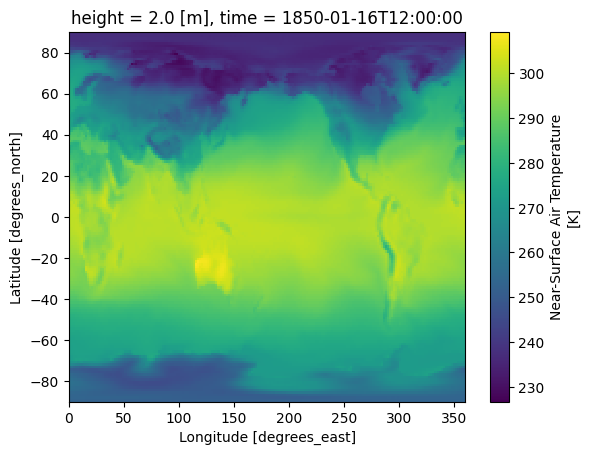

In [7]:
dt.tas.isel(time=0).plot()

### Replot using Robinson Projection

Text(0.5, 1.0, 'January 1850')

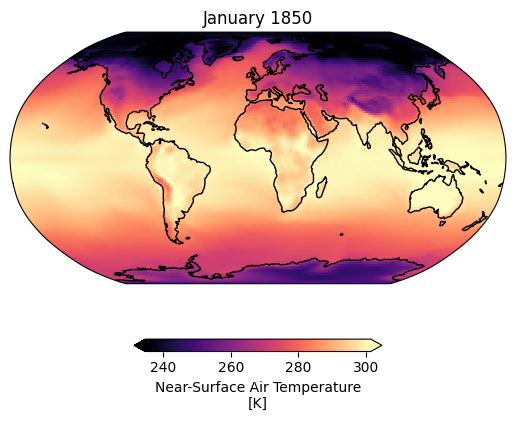

In [8]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

dt.tas.isel(time=0).plot(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)
axis.coastlines() 
axis.set_title("January 1850")

# Access using ESGF Website

### CMIP6 data can be easily downloaded using the [ESGF Metgrid Search Page](https://aims2.llnl.gov/search). 

### An example of CMIP6 data query is shown below:

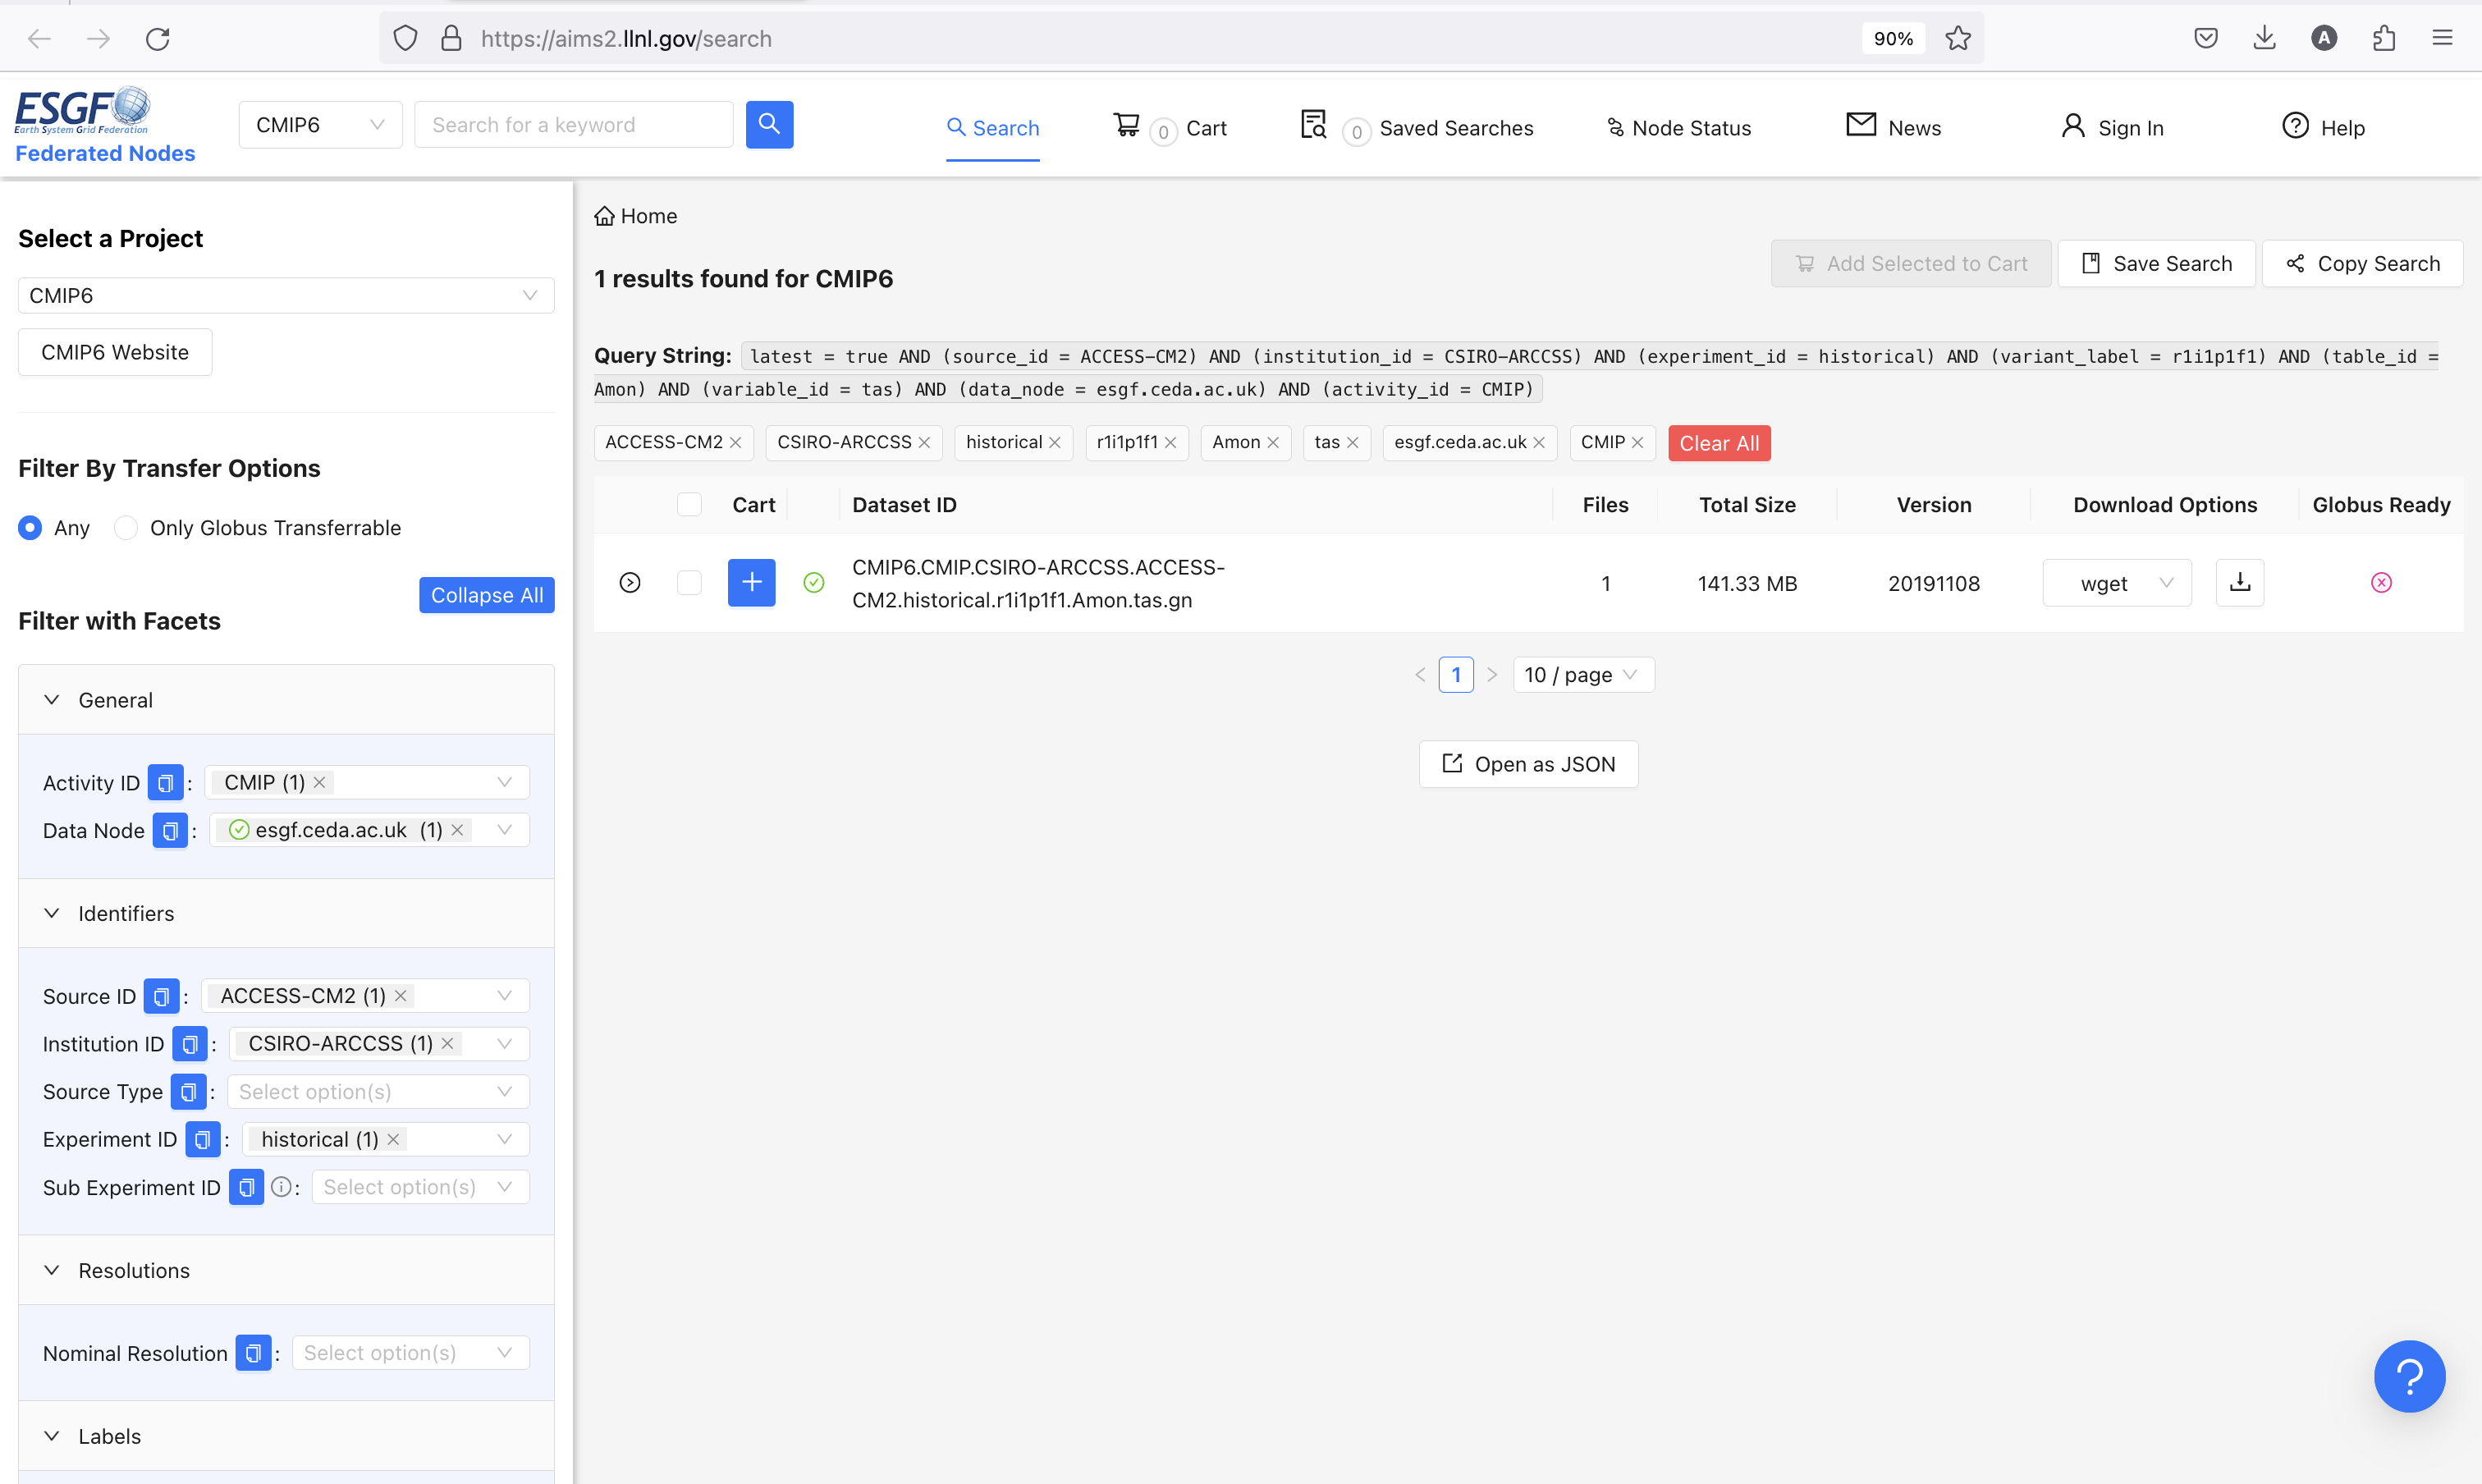

### The CMIP6 query can be downloaded using the wget script available from the "Download Options". Full tutorials are available from the official [website](https://esgf.github.io/esgf-user-support/index.html).

# Access using ESGF-API

### [Earth System Grid Federation](https://esgf.llnl.gov/) infrustructure can also be used to access CMIP6 data using the [ESGF Search API](https://github.com/ESGF/esgf.github.io/wiki/ESGF_Search_REST_API).

### Import all relevant modules

In [9]:
from pyesgf.search import SearchConnection

### Several [nodes](https://wcrp-cmip.org/map/) across the globe host CMIP data. We will query data on one node by connecting to their server

In [10]:
conn = SearchConnection('https://esgf.ceda.ac.uk/esg-search',distrib=False)

### We will search for the same data as above.

In [11]:
ctx = conn.new_context(
    facets='project,experiment_id',
    project='CMIP6',
    table_id='Amon',
    institution_id="CSIRO-ARCCSS",
    experiment_id='historical',
    source_id='ACCESS-CM2',
    variable='tas',
    variant_label='r1i1p1f1',
)

### We will extract the url for the datasets.

In [12]:
result = ctx.search()[0]
files = result.file_context().search()
opendap_url=files[0].opendap_url
opendap_url

'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gn/v20191108/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

In [13]:
de = xr.open_dataset(opendap_url,chunks={'time':480})
de

<xarray.Dataset> Size: 219MB
Dimensions:    (time: 1980, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(480, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 219MB dask.array<chunksize=(480, 144, 192), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    creation_date:                   2019-11-08T06:41:46Z
    ...                              ...
    variant_label:                   r1i1p1f1
    version:                         v20191108
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/d893128b-e107-4dcc-b543-46c...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

### We will plot the first time slot.

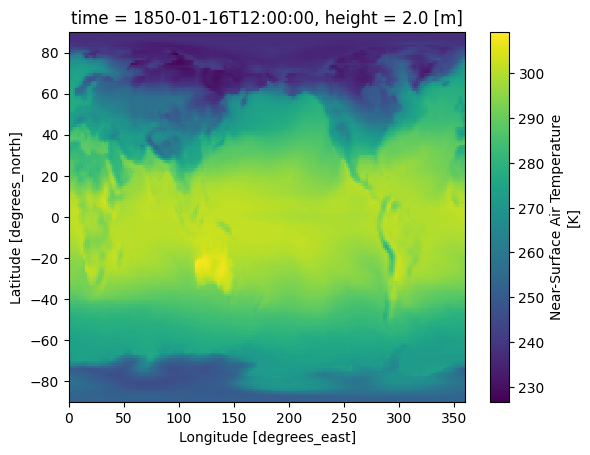

In [14]:
de.tas.isel(time=0).plot()

### Replot using Robinson Projection

Text(0.5, 1.0, 'January 1850')

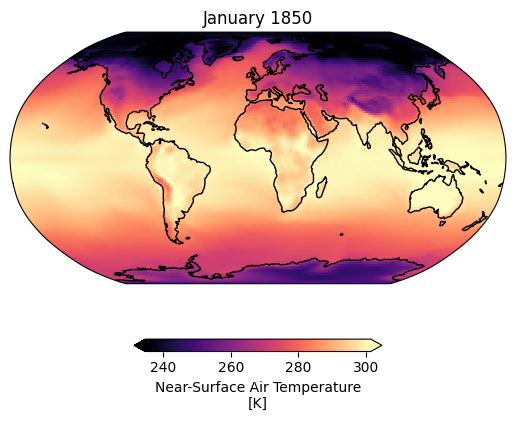

In [15]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

de.tas.isel(time=0).plot(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)
axis.coastlines() 
axis.set_title("January 1850")

# Access using Intake-ESM

### Import all relevant modules

In [16]:
import intake
import warnings
warnings.filterwarnings("ignore")

### [Intake-ESM](https://intake-esm.readthedocs.io/en/latest/) package provides a high-level interface to searching CMIP6 data. We search the [collection spec](https://github.com/NCAR/esm-collection-spec/) using the information stored in the .json file using intake.

In [17]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


### We will now build the search query to export to a dataframe.

In [18]:
cat = col.search(
    table_id='Amon',
    institution_id="CSIRO-ARCCSS",
    experiment_id=['historical'],
    source_id='ACCESS-CM2',
    variable_id='tas',
    member_id='r1i1p1f1',
    grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/...,NaN,20191108


### Intake-ESM automatically opens the dataset.

In [19]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn']

### Get data using Xarrays

In [20]:
ds = dset_dict['CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn']
ds

<xarray.Dataset> Size: 219MB
Dimensions:         (lat: 144, bnds: 2, lon: 192, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
    lat_bnds        (lat, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.9375 2.812 4.688 ... 355.3 357.2 359.1
    lon_bnds        (lon, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-1...
    time_bnds       (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 219MB dask.array<chunksize=(1, 1, 668, 144, 192), meta=np.ndarray>
Attributes: (12/63)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    cmor_version:                     3.4.0
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CSIRO-ARCCSS/ACCE...
    intake_esm_attrs:version:         20191108
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical...

### We will plot the first time slot.

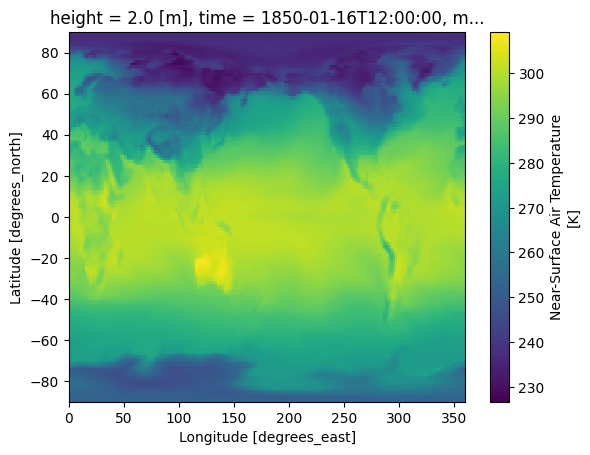

In [21]:
ds.tas.isel(time=0).plot()

### Replot using Robinson Projection

Text(0.5, 1.0, 'January 1850')

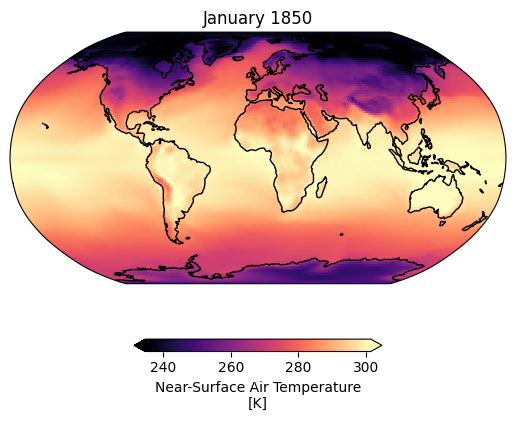

In [22]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Robinson()))

ds.tas.isel(time=0).plot(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.5},
    robust=True,
    cmap="magma"
)
axis.coastlines() 
axis.set_title("January 1850")